ModuleNotFoundError: No module named 'Modules'

/Users/jackmorse/Documents/University/Year 4/FYP/Modules/Refractive_Indices
In,,,,,


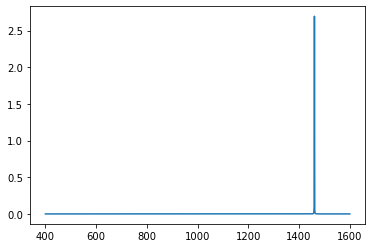

In [3]:
import os

# Get the current working directory
current_directory = os.getcwd()

# Remove the last directory from the path
parent_directory = os.path.dirname(current_directory)
add_to_path = os.path.join(parent_directory, "Modules/Refractive_Indices")
os.listdir(parent_directory)
print(add_to_path)
sys.path.append(add_to_path)
import RefractiveIndexClass
import numpy as np
wavelengths = np.linspace(400, 1600, 1000)
# RefractiveIndexClass.HCF._find_bessel_zero(1, 1.0)
index = RefractiveIndexClass.RefractiveIndex.HCF(wavelengths=wavelengths, part="im")
import matplotlib.pyplot as plt
plt.plot(wavelengths, index)